# Prepare exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import acquire

from vega_datasets import data
from datetime import datetime

## *I. Working to create a prepare file*

### *Getting to know the data*

In [2]:
# Acquiring the necessary file

sales_info = acquire.get_local_sales_info()
sales_info.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [3]:
# General info

sales_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_id        65000 non-null  int64  
 1   sale_amount    65000 non-null  float64
 2   sale_date      65000 non-null  object 
 3   sale_id        65000 non-null  int64  
 4   store_id       65000 non-null  int64  
 5   item_brand     65000 non-null  object 
 6   item_name      65000 non-null  object 
 7   item_price     65000 non-null  float64
 8   item_upc12     65000 non-null  int64  
 9   item_upc14     65000 non-null  int64  
 10  store_address  65000 non-null  object 
 11  store_city     65000 non-null  object 
 12  store_state    65000 non-null  object 
 13  store_zipcode  65000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ MB


In [4]:
sales_info.shape

(65000, 14)

In [5]:
sales_info.columns.tolist()

['item_id',
 'sale_amount',
 'sale_date',
 'sale_id',
 'store_id',
 'item_brand',
 'item_name',
 'item_price',
 'item_upc12',
 'item_upc14',
 'store_address',
 'store_city',
 'store_state',
 'store_zipcode']

### *1. Convert date column to datetime format*

In [6]:
# Displaying the content of sale_date column as well as length and data type

sales_info.sale_date

0        Tue, 01 Jan 2013 00:00:00 GMT
1        Wed, 02 Jan 2013 00:00:00 GMT
2        Thu, 03 Jan 2013 00:00:00 GMT
3        Fri, 04 Jan 2013 00:00:00 GMT
4        Sat, 05 Jan 2013 00:00:00 GMT
                     ...              
64995    Tue, 22 Dec 2015 00:00:00 GMT
64996    Wed, 23 Dec 2015 00:00:00 GMT
64997    Thu, 24 Dec 2015 00:00:00 GMT
64998    Fri, 25 Dec 2015 00:00:00 GMT
64999    Sat, 26 Dec 2015 00:00:00 GMT
Name: sale_date, Length: 65000, dtype: object

In [21]:
# Setting sale_date to a datetime format

pd.to_datetime(sales_info.sale_date)

0       2013-01-01 00:00:00+00:00
1       2013-01-02 00:00:00+00:00
2       2013-01-03 00:00:00+00:00
3       2013-01-04 00:00:00+00:00
4       2013-01-05 00:00:00+00:00
                   ...           
64995   2015-12-22 00:00:00+00:00
64996   2015-12-23 00:00:00+00:00
64997   2015-12-24 00:00:00+00:00
64998   2015-12-25 00:00:00+00:00
64999   2015-12-26 00:00:00+00:00
Name: sale_date, Length: 65000, dtype: datetime64[ns, UTC]

### *2. Plot the distribution of sale_amount and item_price*

In [22]:
# Checking the number of categories inside sale_amount

sales_info.sale_amount.nunique()

143

<AxesSubplot:>

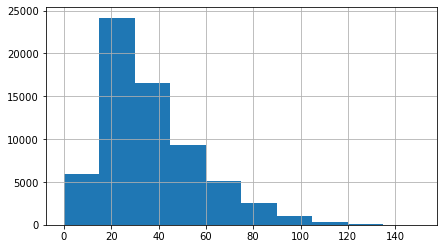

In [8]:
# Plotting sale_amount

plt.figure(figsize= (7, 4))
sales_info.sale_amount.hist()

In [9]:
# Checking the number of categories inside item_price and their label

sales_info.item_price.unique()

array([0.84, 6.44, 2.43, 3.14])

<AxesSubplot:>

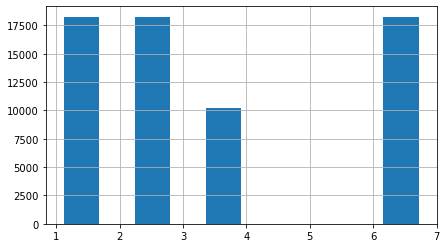

In [10]:
# Plotting sale_amount

plt.figure(figsize= (7, 4))
sales_info.item_price.hist(align='right')

### *3. Set the index to be the datetime variable*

In [23]:
sales_info1 = sales_info.set_index('sale_date').sort_index()
sales_info1.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
"Fri, 01 Apr 2016 00:00:00 GMT",2,53.0,23099,3,Caress,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925,2118 Fredericksburg Rdj,San Antonio,TX,78201
"Fri, 01 Apr 2016 00:00:00 GMT",1,22.0,10317,6,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1015 S WW White Rd,San Antonio,TX,78220
"Fri, 01 Apr 2016 00:00:00 GMT",2,53.0,30403,7,Caress,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925,12018 Perrin Beitel Rd,San Antonio,TX,78217
"Fri, 01 Apr 2016 00:00:00 GMT",1,21.0,6665,4,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,516 S Flores St,San Antonio,TX,78204
"Fri, 01 Apr 2016 00:00:00 GMT",3,48.0,41359,3,Earths Best,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139,2118 Fredericksburg Rdj,San Antonio,TX,78201


### *4. Add a 'month' and 'day of week' column to your dataframe*

**The data is in GMT and I will convert it to Central**

In [26]:
sales_info1 = (sales_info.tz_localize("utc").tz_convert("US/Central"))
sales_info1.head()

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [14]:
sales_info['month']  = sales_info.index.strftime('%m-%b')
sales_info.head()

AttributeError: 'RangeIndex' object has no attribute 'strftime'

In [ ]:
sales_info['weekday'] = sales_info.index.strftime('%w-%a')

### *5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price*

### *6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results*

****

## *II. Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following*

### *1. Convert date column to datetime format*

### *2. Plot the distribution of each of your variables*

### *3. Set the index to be the datetime variable*

### *4. Add a month and a year column to your dataframe*

### *5. Fill any missing values*

### *6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results*